In [1]:
from skimage.io import imread, imshow
from skimage.util import img_as_ubyte
from skimage.morphology import erosion, opening, dilation, square, label, opening, closing, white_tophat, black_tophat, disk
from skimage.exposure import rescale_intensity
import numpy as np
from matplotlib import pyplot as plt 

## Question 1

In [2]:
f_text = img_as_ubyte(imread('data/labG_images/text-image.tif'))//255

In [3]:
F_se   = np.ones([51,1]) 
F_text = erosion(f_text,footprint=F_se)

In [4]:
g_text = opening(f_text,footprint=F_se)

In [5]:
h_se = square(3)
h_text = np.copy(F_text)
for i in range(100):
    h_text = dilation(h_text,footprint=h_se)*f_text         # Intersection

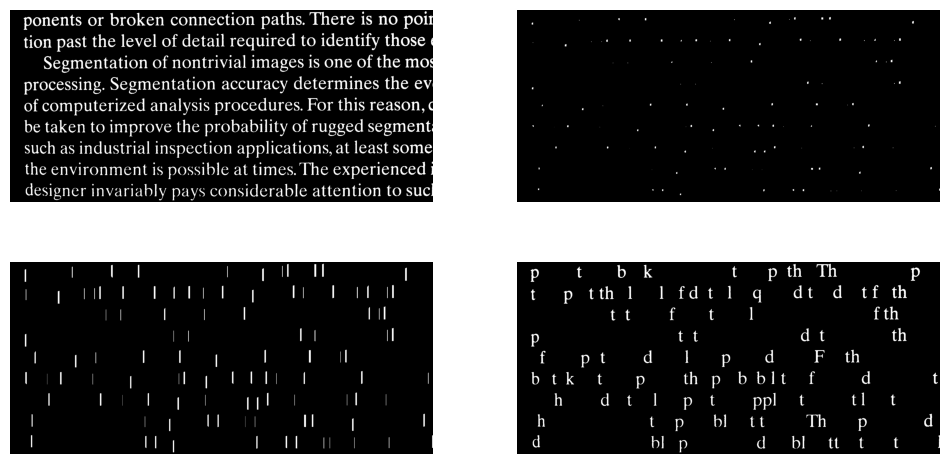

In [6]:
plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(12,6))
plt.subplot(2,2,1), plt.imshow(f_text, cmap='gray'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(F_text, cmap='gray'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(g_text, cmap='gray'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(h_text, cmap='gray'), plt.axis('off')
plt.show()

## Question 2

In [7]:
i_text_seg = label(f_text)

In [8]:
border_ind = np.where(i_text_seg[:,-1]!=0)
border_label = np.unique(i_text_seg[border_ind,-1])
border_mask = img_as_ubyte(np.isin(i_text_seg,border_label))//255

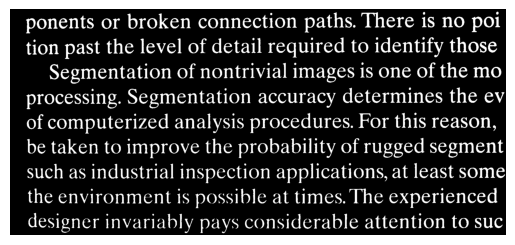

In [9]:
plt.imshow(f_text-border_mask,cmap='gray')
plt.axis('off')
plt.show()

## Question 3

In [10]:
f_circuit = imread('data/labG_images/circuitboard_clean.tif')

In [11]:
se_circuit = square(10)

In [12]:
f_circuit_ero = erosion(f_circuit,se_circuit)
f_circuit_dil = dilation(f_circuit,se_circuit)
f_circuit_opn = opening(f_circuit,se_circuit)
f_circuit_cls = closing(f_circuit,se_circuit)

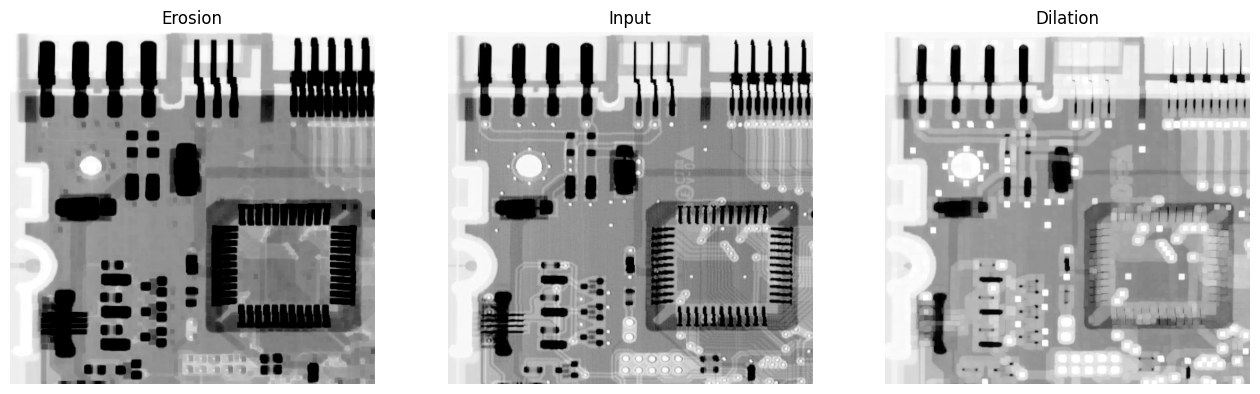

In [13]:
plt.subplots(1,3,figsize=(16,10))
plt.subplot(1,3,1), plt.imshow(f_circuit_ero,cmap='gray'), plt.axis('off'),plt.title('Erosion')
plt.subplot(1,3,2), plt.imshow(f_circuit,cmap='gray'), plt.axis('off'),plt.title('Input')
plt.subplot(1,3,3), plt.imshow(f_circuit_dil,cmap='gray'), plt.axis('off'),plt.title('Dilation')
plt.show()

Erosion is darker. The dimensions of the object in the image are larger. In both cases the edges have been smoothened.

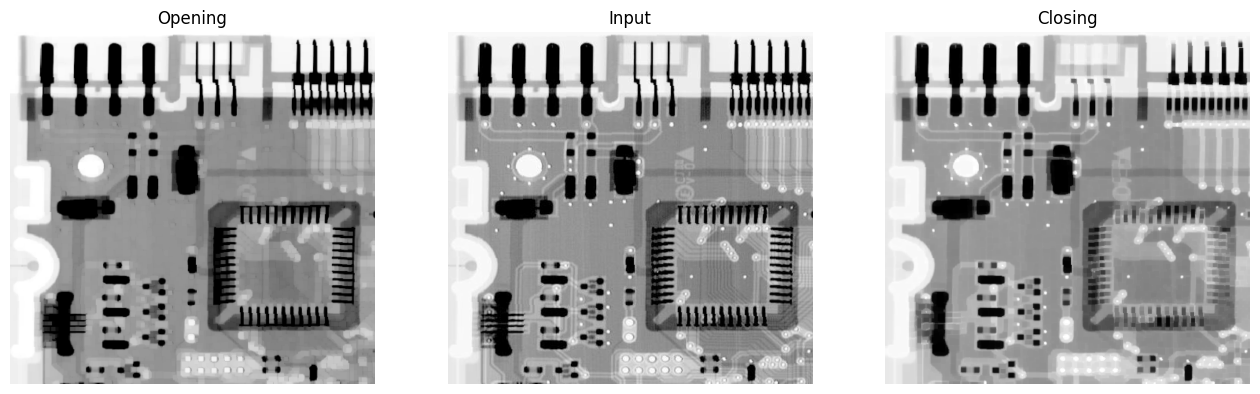

In [14]:
plt.subplots(1,3,figsize=(16,10))
plt.subplot(1,3,1), plt.imshow(f_circuit_opn,cmap='gray'), plt.axis('off'),plt.title('Opening')
plt.subplot(1,3,2), plt.imshow(f_circuit,cmap='gray'), plt.axis('off'),plt.title('Input')
plt.subplot(1,3,3), plt.imshow(f_circuit_cls,cmap='gray'), plt.axis('off'),plt.title('Closing')
plt.show()

After opening the small bright features have been removed. The size of the objects has been preserved. Small black features lightened

## Question 4

In [15]:
f_head = imread('data/labG_images/headCT.tif')

In [16]:
se_head = square(5)

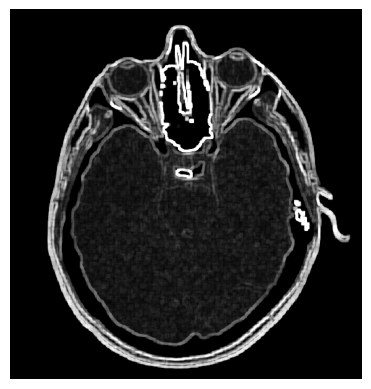

In [17]:
plt.imshow(dilation(f_head,se_head)-erosion(f_head,se_head),cmap='gray')
plt.axis('off')
plt.show()

## Question 4

In [18]:
f_rice = imread('data/labG_images/rice.tif')

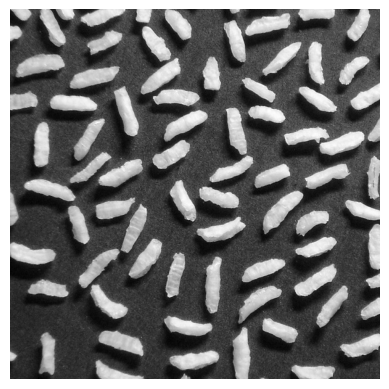

In [19]:
plt.imshow(f_rice,cmap='gray')
plt.axis('off')
plt.show()

In [20]:
se_rice_tp = disk(25)
g_rice = white_tophat(f_rice,se_rice_tp)
se_rice_bm = disk(55)
h_rice = black_tophat(f_rice,se_rice_bm)

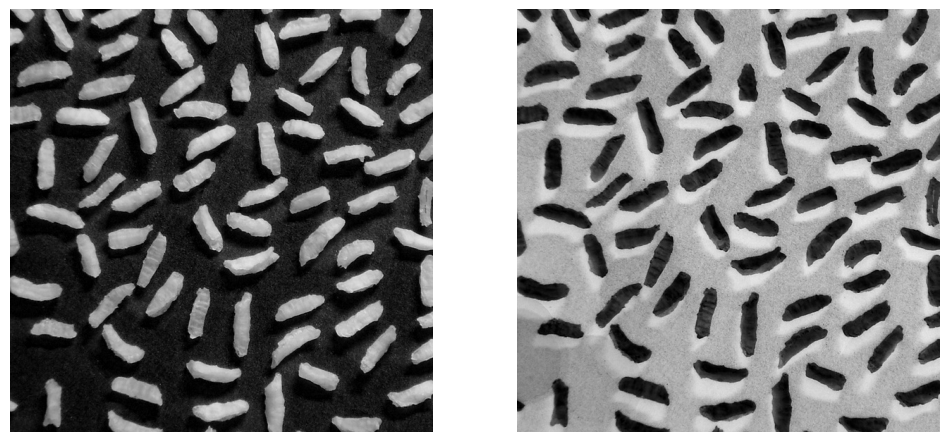

In [21]:
plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(g_rice,cmap='gray',vmin=0,vmax=255), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(h_rice,cmap='gray',vmin=0,vmax=255), plt.axis('off')
plt.show()

Top hat - Returns objects smaller than SE and brighter than surrounds